Advanced Customization

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast

# import data
df = pd.read_csv("/goinfre/hrami/python/python_for_data/data_jobs.csv")

# data cleanup
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)



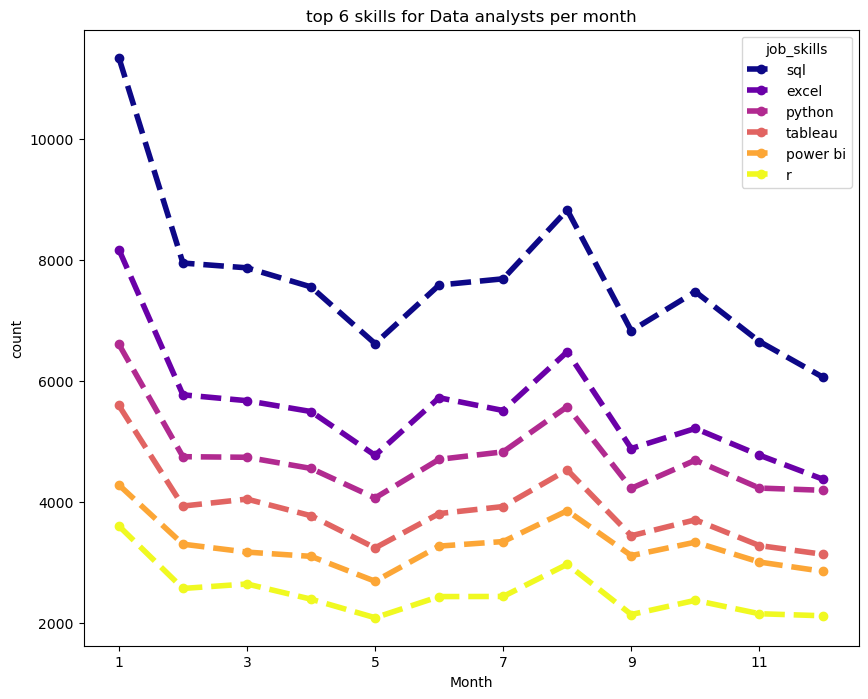

In [59]:
df_da = df[df['job_title_short'] == 'Data Analyst'].copy()

df_da['job_posted_month_no'] = df_da['job_posted_date'].dt.month
df_da_explode = df_da.explode('job_skills')
df_da_pivot = df_da_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)
df_da_pivot.loc['Total'] = df_da_pivot.sum()
df_da_pivot = df_da_pivot[df_da_pivot.loc['Total'].sort_values(ascending=False).index]
df_da_pivot = df_da_pivot.drop('Total')

df_da_pivot.iloc[:,:6].plot(
    kind="line",
    linewidth=4,
    linestyle='--', # more option
    colormap='plasma', # more option
    marker="o", # more option
    markersize=6,
    figsize=(10,8)

)
plt.title('top 6 skills for Data analysts per month')
plt.ylabel('count')
plt.xlabel('Month')
plt.show()